In [69]:
from sklearn.ensemble import AdaBoostRegressor
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , root_mean_squared_error

In [70]:
#Donwload historical S&P 500 data
SP_data=yf.download('^GSPC', start='2015-11-23',end='2024-12-19')
#Extract the closing prices as the target variable
SP_prices=SP_data['Close'].values.reshape(-1,1)
#Create a feature matrix with consecutive numbers as features
X = np.arange(len(SP_prices)).reshape(-1,1)
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,SP_prices,test_size=0.2,random_state=42)

[*********************100%***********************]  1 of 1 completed


In [71]:
#Create and train a AdaBoostRegressor model
model = AdaBoostRegressor(n_estimators=50,random_state=42)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

In [72]:
#Make predictions on the test set
y_pred = model.predict(X_test)
#Evaluate the model
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 30252.734394371215


In [73]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f"Performance on Training Set:")
print(f" - MSE: {mse_train}")
print(f" - MAE: {mae_train}")
print(f" - R2 Score: {r2_train}")
print(f" - RMSE Score: {rmse_train}\n")

print(f"Performance on Test Set:")
print(f" - MSE: {mse_test}")
print(f" - MAE: {mae_test}")
print(f" - R2 Score: {r2_test}")
print(f" - RMSE Score: {rmse_test}\n")

Performance on Training Set:
 - MSE: 29470.758032413294
 - MAE: 131.32792098926683
 - R2 Score: 0.972870743665368
 - RMSE Score: 171.6704926084075

Performance on Test Set:
 - MSE: 30252.734394371215
 - MAE: 132.8866708968329
 - R2 Score: 0.9727358411412586
 - RMSE Score: 173.93313196274946



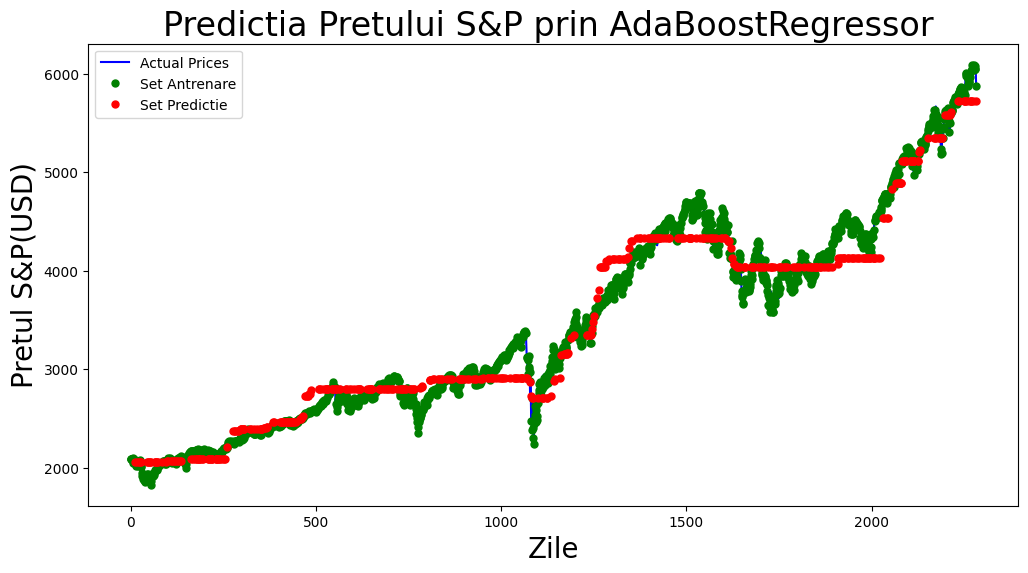

In [74]:
#Plot the actual prices and predicted prices
plt.figure(figsize=(12,6))
plt.plot(X, SP_prices, label='Actual Prices', color='blue')
plt.plot(X_train, y_train, 'go', label='Set Antrenare', markersize=5)
plt.plot(X_test, y_pred, 'ro', label='Set Predictie', markersize=5)
plt.xlabel('Zile',fontsize=20)
plt.ylabel('Pretul S&P(USD)',fontsize=20)
plt.title('Predictia Pretului S&P prin AdaBoostRegressor ',fontsize=24)
plt.legend()
plt.show()